# **TITANIC**

## **Meu diário na competição do Titanic**

### **17/09/2022 - Download e Análise Exploratória dos Dados**


[![author](https://img.shields.io/badge/author-evaldojunior-red.svg)](https://www.linkedin.com/in/evaldo-junior-89094244/) [![](https://img.shields.io/badge/python-3.7+-blue.svg)](https://www.python.org/downloads/release/python-365/) [![GPLv3 license](https://img.shields.io/badge/License-GPLv3-blue.svg)](http://perso.crans.org/besson/LICENSE.html)

<p align="center">
  <img src="titanic.png" >
</p>

Estudar machine learning sem se deparar com o DataSet do Titanic é quase a mesma coisa que chupar bala com papel, definitivamente não tem a menor graça.
É quase a mesma coisa do que passar pela vida sem ter tido um fusca ou ser ter corrido uma maratona. Você simplesmente tem que fazer. 

Bem, a história do Titanic simplesmente dispensa qualquer comentário, e se você não conhece eu vou te falar um pouco sobre ele.

De forma bem simples e direta ele foi construído para ser o navio mais luxuoso e seguro do mundo. Pelo menos este era o plano inicial. Só que toda vez que os homens fazem planos, Deus dá uma bela gargalhada. 

No dia 10 de Abril de 1912 a embarcação saiu de Southampton ao sul do Reino Unido com destino a Nova Iorque. Só que no meio do caminho no dia 14 de Abril do mesmo ano ele colidiu com Iceberg o que fez com o navio sofresse danos em sua estrutura e naufragasse no dia seguinte com mais de 1500 pessoas a bordo. 

O mais foda é que o navio não tinha botes salva vidas para toda tripuluação o que acabou por gerar uma das maiores trajédias maritmas de todos os tempos. 

A história por si é sinistra, e talvez por isso os dados sobre este evento trágico chamam tanto atenção de quem está entrando no mundo de Machine Learning.

O [kaggle](https://www.kaggle.com/) tem uma competição aberta que aborda justamente este DataSet e é de lá que vem os dados que vou fazer a análise exploratória hoje. E não só a análise exploratória. Vou postar também minha evolução dentro da competição. 

>Bora pra cima dos dados!!!


---

## **Objetivo da Competição**

O objetivo é desenvolver modelos que possam predizer da forma mais assertiva possível quais passageiros sobreviveram e quais não. 
Como o “alvo” do projeto é algo binário, utilizarei vários modelos de classificação para tentar atingir este objetivo. 

Minha abordagem inicial será a de exploração dos dados para conhecer melhor o DataSet e validar algumas hipóteses e em paralelo com isso  ir trabalhando nos dados faltantes. 

Durante esta etapa também, pretendo ir fazendo anotações à medida em que for conhecendo melhor os dados para que em etapas posteriores eu vá testando diferentes abordagens com a finalidade de melhorar a performance dos modelos empregados. 


---

## **1.0 Sobre os Dados**


- **Survival** - Informa se o passegeiro sobreviveu ou faleceu
- **Pclass** - Informa se o passageiro estava alocado na 1ª, 2ª ou 3ª Classe do Navio
- **Name** - Informa o nome do passageiro
- **Sex** - Informa se o tripulante é so sexo Masculino ou Feminino
- **Age** - Informa a idade do tripulante
- **Sibsp** - Informa a quantidade de irmãos / cônjuges a bordo do Titanic
- **Parch** - Informa a quantidade de pais / crianças a bordo do Titanic
- **Ticket** - Informa o numero do bilhete do passageiro
- **Fare** - Valor que o passageiro pagou pelo ingresso no Navio
- **Cabin** - Informa a cabine que o passageiro ficou hospedado 
- **Embarked** - Informa o portão que o passageiro embarcou

---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

sns.set()

---

### **1.2 - Sobre o import dos dados**

A primeira coisa que chama atenção é a diferença entre os dados de treino e teste.

Observe que o Dataset de Treino possui o Campo Survived, e o Dataset de Teste não.

Isso acontece porque o DataSet de treino é justamente o DataSet onde serão feitas as previsões dos modelos, e para
não ter o risco de algum participante burlar a competição treinando os modelos no DataSet de Teste, ele vem sem 
esta informação de forma proposital. 


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.shape, test.shape

((891, 12), (418, 11))

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### **1.3 Dados faltantes e Categóricos**

A minha estratégia aqui é juntar os dois DataSets para que eu possa trabalhar todas Features de forma única e depois de remover todos os dados faltantes, de ter trabalhado com as variáveis categóricas e ter me certificado de ter uma base em condições de entregar para um modelo, fazer a separação entre treino e teste novamente. 

Para facilitar meu trabalho de separação dos DataSets, irei criar uma variável que armazenará a quantidade de linhas do DataSet de treino. 


In [6]:
#Jutando os DataSets
df = pd.concat([train, test])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


>Veja que agora temos um DataSet com 1309 linhas.

In [7]:
# Dados Faltantes
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


As Features Age, Fare e Embarked terão de ser tratadas de forma individual e cada uma terá uma estratégia para o preenchimento dos dados. 

Já a Feature Cabin, possui muitos dados faltantes e por conta disso não levarei em consideração e farei um Drop nela. 

Outro ponto é que a Feature Ticket é um campo que ao que parece não contribui muito para o modelo, logo creio que não irá contribuir muito para a performance do modelo. Pelo menos nesta primeira abordagem eu irei dropá-la também. 

Tabem irei aproveitar e criar uma função que utilizarei para visualizar todas as Features.


In [9]:
def verificaFeatures(x, categorical = False):
    if categorical == False:
        print(f'---------- Feature:{x} ------------\n')
        print(f'Percentual de registros por Feature\n{round(df[x].value_counts(normalize = True),2)}\n')
        print(f'Quantidade de registros por Feature\n{round(df[x].value_counts(),2)}\n')
        imagem = sns.countplot(data = df, x = x, hue = 'Survived')
        imagem.set_title(x, fontsize = 20)
        imagem.figure.set_size_inches(15,7)
    else:
        sns.displot(df[x], height= 7, aspect= 15/10)

In [10]:
# Dropando feature Cabin e Ticket
df.drop(['Cabin', 'Ticket'], axis = 1, inplace = True)

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


### **1.4.Feature Survived**

---------- Feature:Survived ------------

Percentual de registros por Feature
0.0    0.62
1.0    0.38
Name: Survived, dtype: float64

Quantidade de registros por Feature
0.0    549
1.0    342
Name: Survived, dtype: int64



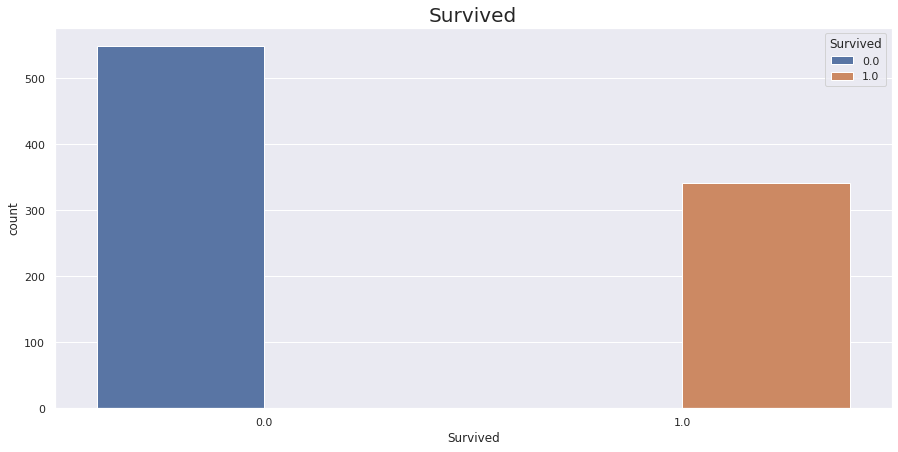

In [12]:
verificaFeatures('Survived')

### **1.5.Feature Pclass**

A terceira classe foi de longe a classe em que mais morreram pessoas.

Já a primeira, foi a que mais teve sobreviventes. 


---------- Feature:Pclass ------------

Percentual de registros por Feature
3    0.54
1    0.25
2    0.21
Name: Pclass, dtype: float64

Quantidade de registros por Feature
3    709
1    323
2    277
Name: Pclass, dtype: int64



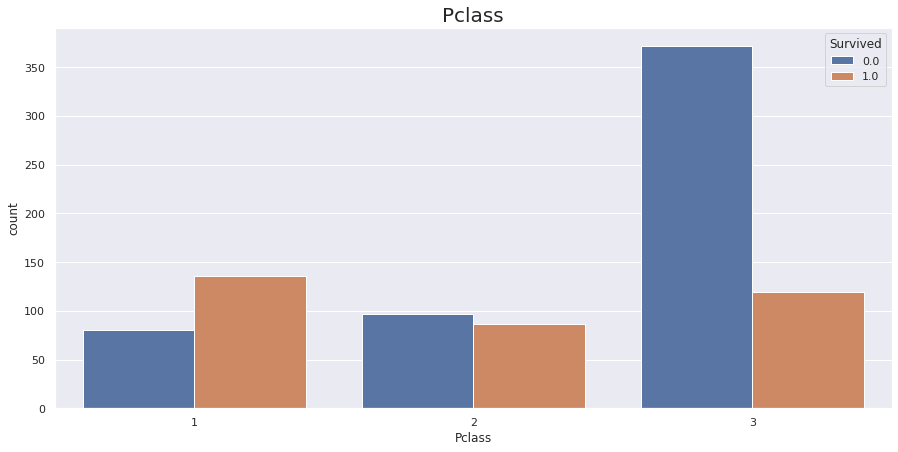

In [13]:
verificaFeatures('Pclass')

### **1.6.Feature Sex**

Observando os dados desta Feature pode-se observar que a quantidade de homens que foi a óbito é bem maior do que a de mulheres. 

Isso valida a máxima de ‘Mulheres e Crianças” primeiro que sempre vemos em todos os filmes.

---------- Feature:Sex ------------

Percentual de registros por Feature
male      0.64
female    0.36
Name: Sex, dtype: float64

Quantidade de registros por Feature
male      843
female    466
Name: Sex, dtype: int64



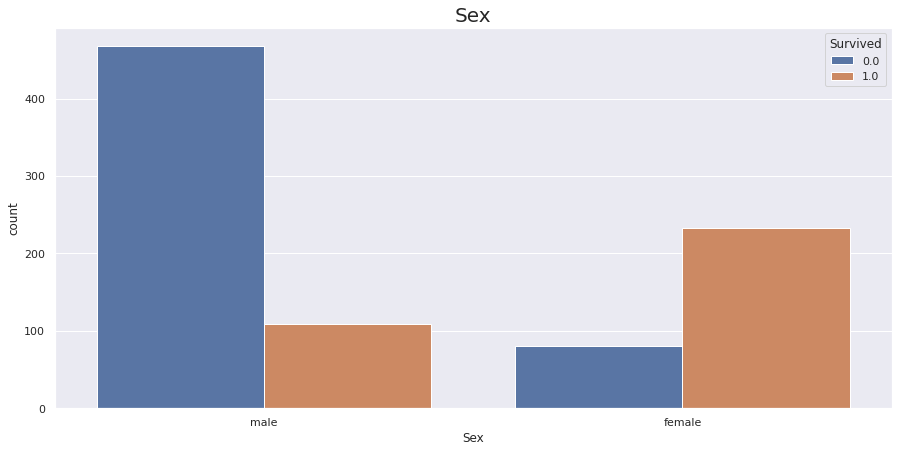

In [14]:
verificaFeatures('Sex')

### **1.7.Feature AGE**

 A maior parte dos passageiros tinha entre 20 e 45 anos. 

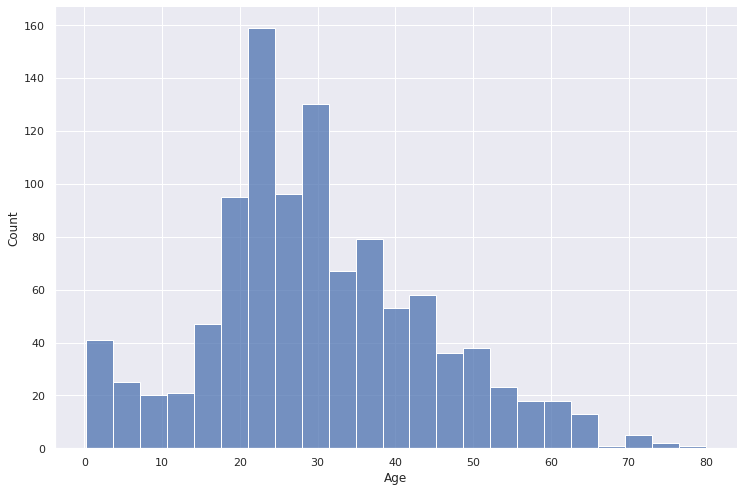

In [15]:
verificaFeatures('Age', True)

### **1.8.Feature SibSp**

---------- Feature:SibSp ------------

Percentual de registros por Feature
0    0.68
1    0.24
2    0.03
4    0.02
3    0.02
8    0.01
5    0.00
Name: SibSp, dtype: float64

Quantidade de registros por Feature
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64



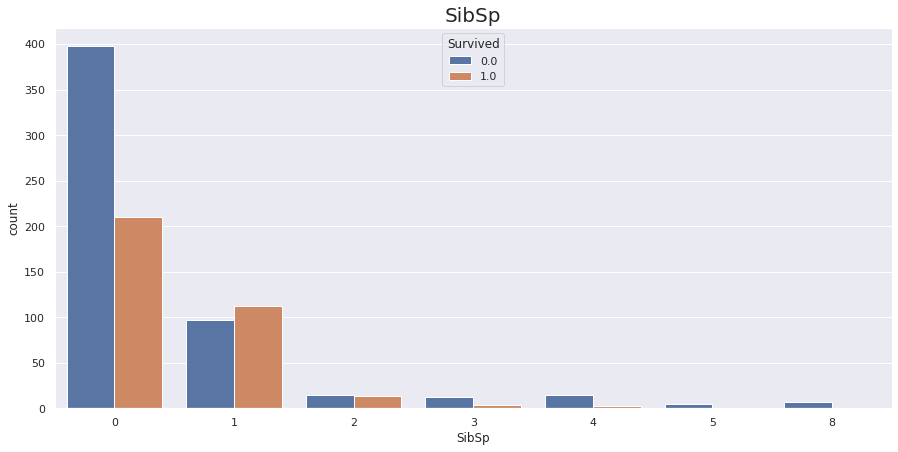

In [16]:
verificaFeatures('SibSp')

### **1.9.Feature Parch**

---------- Feature:Parch ------------

Percentual de registros por Feature
0    0.77
1    0.13
2    0.09
3    0.01
5    0.00
4    0.00
6    0.00
9    0.00
Name: Parch, dtype: float64

Quantidade de registros por Feature
0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: Parch, dtype: int64



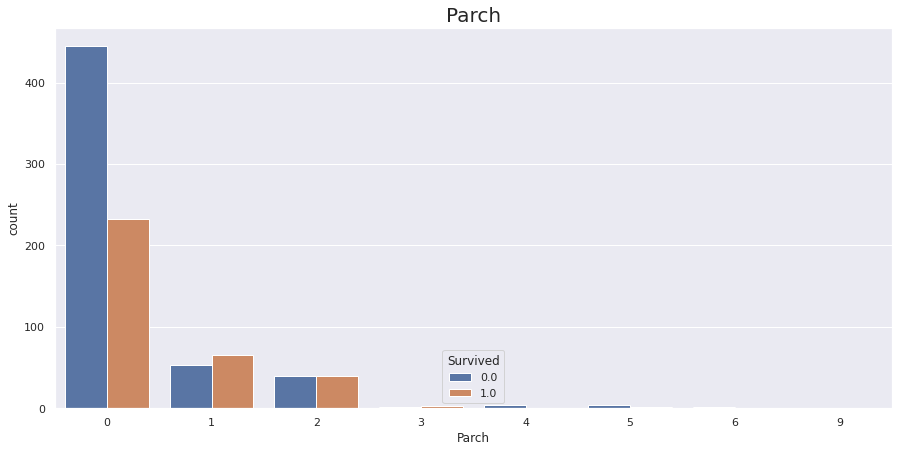

In [17]:
verificaFeatures('Parch')

### **1.10.Featue Fare**

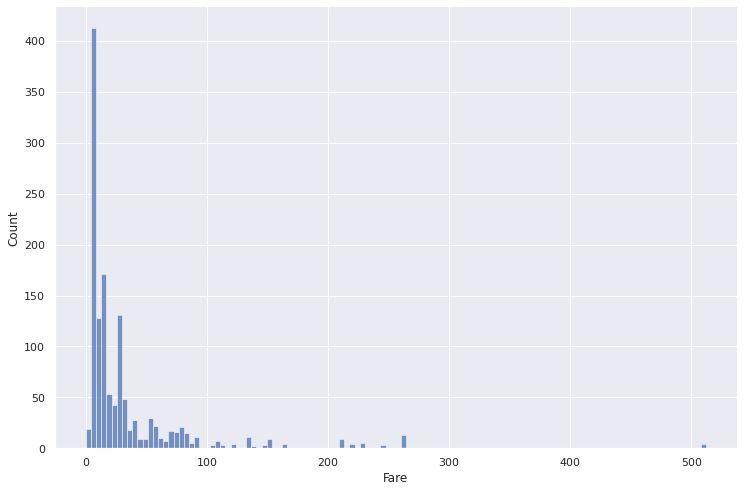

In [18]:
verificaFeatures('Fare', True)

### **1.11.Feature Embarked**

---------- Feature:Embarked ------------

Percentual de registros por Feature
S    0.70
C    0.21
Q    0.09
Name: Embarked, dtype: float64

Quantidade de registros por Feature
S    914
C    270
Q    123
Name: Embarked, dtype: int64



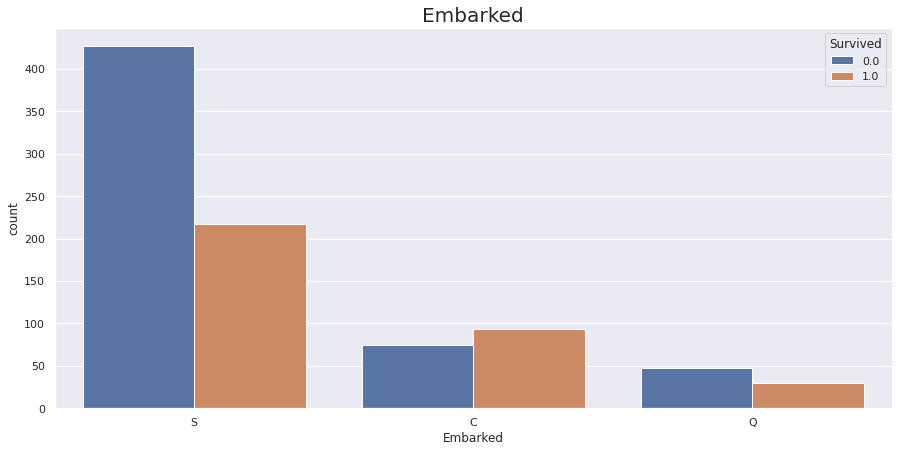

In [19]:
verificaFeatures('Embarked')

### **1.12.Idade por Classe**

Pessoas com idade maior geralmente estão na classe 1. 

Logo, estas podem ser pessoas de poder aquisitivo um pouco mais alta. 

Na próxima célula você vai entender do que estou falando.

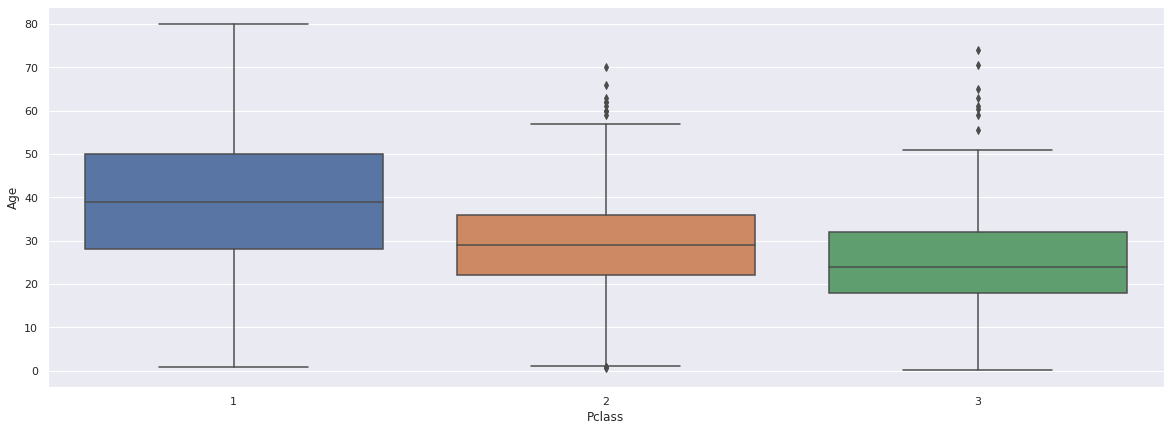

In [20]:
imagem = sns.boxplot(data = df, x = 'Pclass', y = 'Age')
imagem.figure.set_size_inches(20,7)

### **1.13.Mediana de Preço por Classe**

Pode-se notar que a mediana de preços da 1ª Classe é bem mais elevada do a das outras classes.

O que acaba validando o que tinha questinado anteriormente. 

   Pclass     Fare
0       1  60.0000
1       2  15.0458
2       3   8.0500


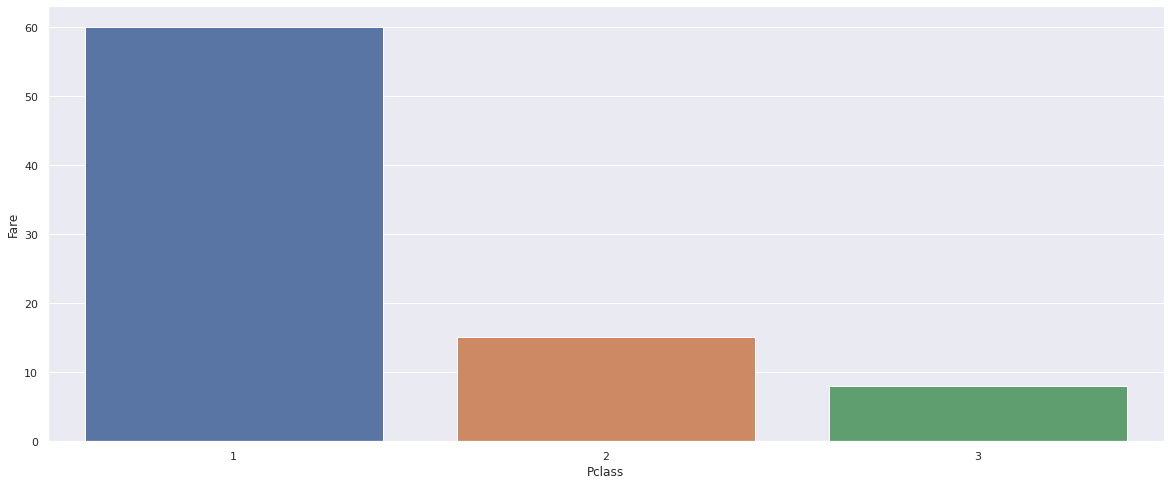

In [33]:
prcoPorClasse = df.groupby(['Pclass'], as_index = False)['Fare'].median()
print(prcoPorClasse)
temp = sns.barplot(data = prcoPorClasse, x = 'Pclass', y = 'Fare')
temp.figure.set_size_inches(20,8)